# Div Scaling & Rank-frequency plots


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
plt.rcParams.update({'font.size': 17})
import statsmodels.api as sm
import matplotlib.lines as mlines
from scipy import stats
from matplotlib.ticker import LogLocator
from matplotlib.ticker import NullFormatter
import copy 
import matplotlib.colors as mcolors
# import custom functions
import ipynb.fs.defs.my_functions as myFun
from scipy.stats import norm

## 1. Load prepared data

In [2]:
fed = pd.read_csv('Formated data/fed.csv')
norway =  pd.read_csv('Formated data/norway.csv')
uni =  pd.read_csv('Formated data/uni.csv') #university bacheler degree and above
uni_asso = pd.read_csv('Formated data/uni_associate.csv') # university associate degrees

## 2. Plot diversity scaling for Fed agencies,industries, and universities. 

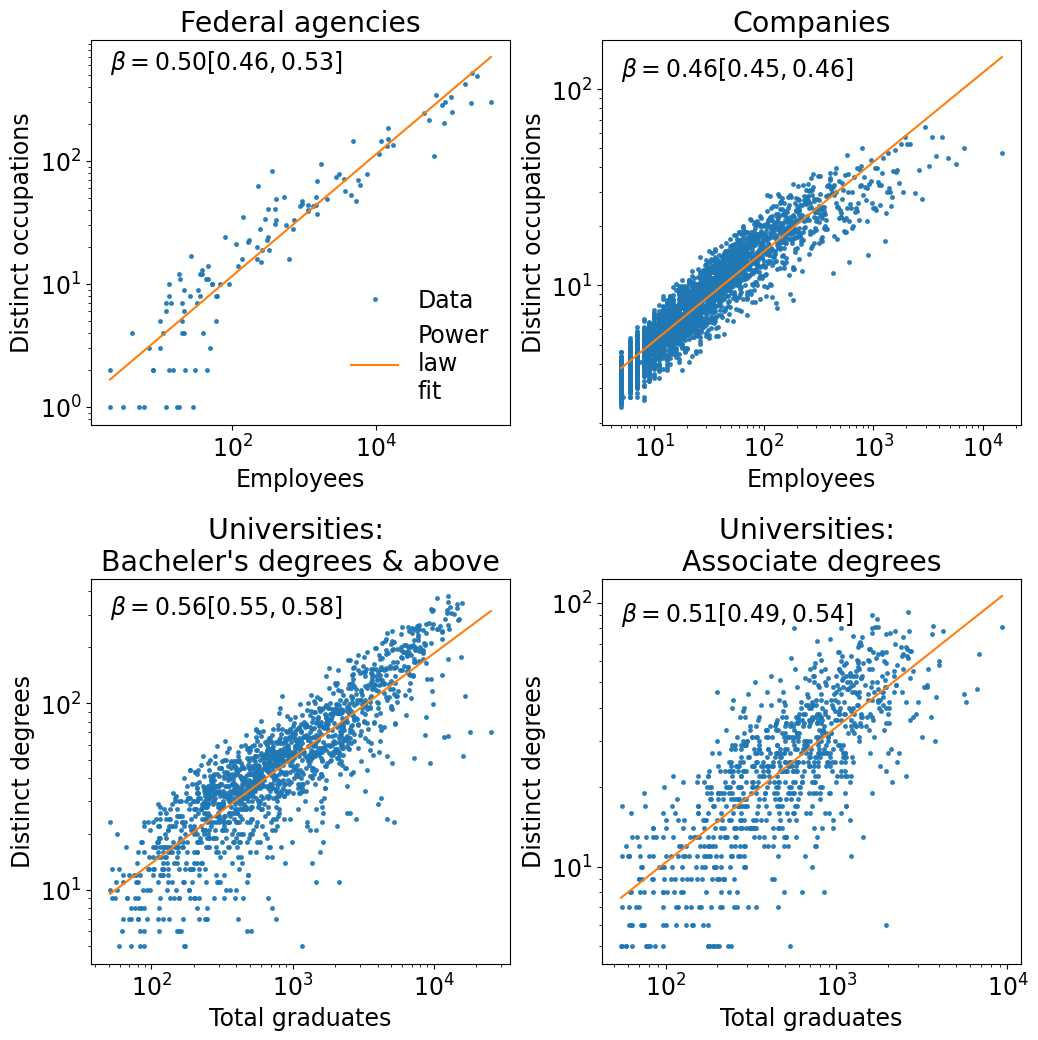

In [3]:
plt.figure(figsize = (12, 12))
nrow = 2
ncol = 2


plt.subplot(nrow, ncol, 1)
# --- Fed Agencies ---- 

out1 = myFun.plotScaling(fed, "N", "D")
plt.xlabel("Employees")
plt.ylabel("Distinct occupations")
plt.title("Federal agencies")

plt.legend(['Data', 'Power\nlaw\nfit'],frameon=False, loc= 4)

# ----Compaines --- 
ax1 = plt.subplot(nrow, ncol, 2)

out2 = myFun.plotScaling(norway, "N", "D")
ax1.set_xlabel("Employees")
ax1.set_ylabel("Distinct occupations")

ax1.set_title("Companies")



# ---Universities Bachelers degrees & above ---- 

plt.subplot(nrow, ncol, 3)

plt.title("Universities: \nBacheler's degrees & above")
#uni_filtered = uni

out3 = myFun.plotScaling(uni, "N", "D")
plt.xlabel("Total graduates")
plt.ylabel("Distinct degrees")


# ---Universities associate degrees---- 
plt.subplot(nrow, ncol, 4)


plt.title("Universities: \nAssociate degrees")
#uni_filtered = uni[(uni.N>= 50) & (uni.D >= 5)]

out4 = myFun.plotScaling(uni_asso, "N", "D")
plt.xlabel("Total graduates")
plt.ylabel("Distinct degrees")
#plt.ylim([2, 2e2])


plt.subplots_adjust(wspace=0.22, hspace=0.4)
plt.savefig('diversity_scaling.pdf', bbox_inches='tight')  


## Plot the rank-frequency distributions

In [4]:
fed_rank_freq = pd.read_csv('Formated data/fed_rank_freq.csv')
uni_rank_freq = pd.read_csv('Formated data/uni_freq.csv')
uni_assoc_freq = pd.read_csv('Formated data/uni_assoc_freq.csv')

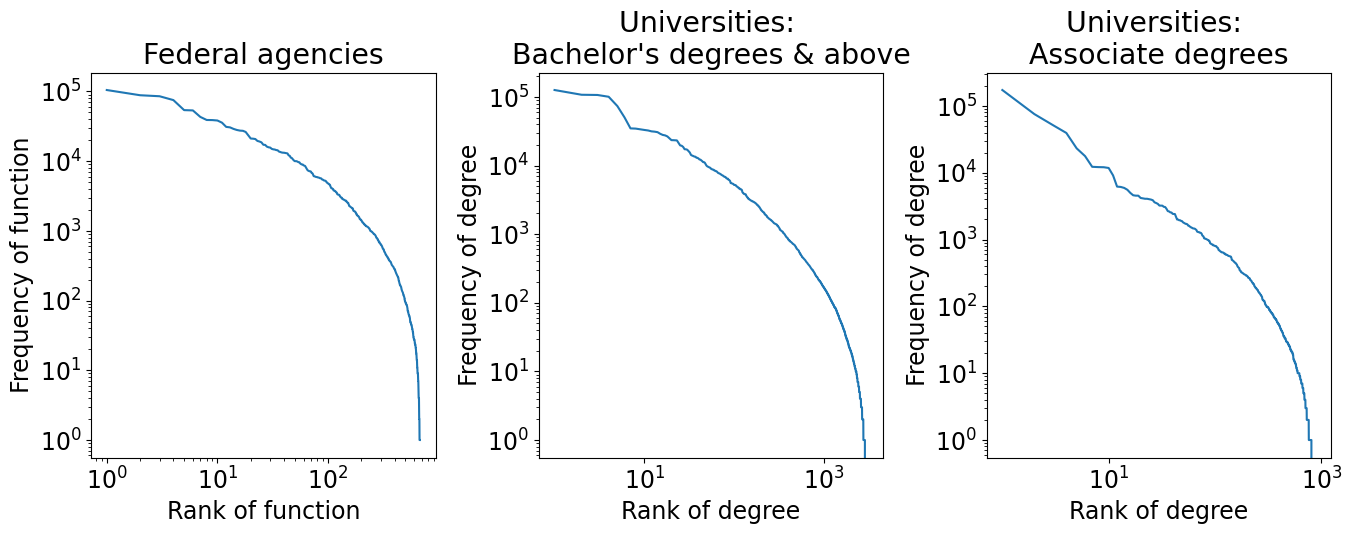

In [5]:
plt.figure(figsize = (16, 5))
nrow = 1
ncol = 3

plt.subplot(nrow, ncol, 1)
plt.loglog(fed_rank_freq['rank'], fed_rank_freq['n'])

plt.title("Federal agencies")
plt.xlabel("Rank of function")
plt.ylabel("Frequency of function")

plt.subplot(nrow, ncol, 2)
plt.loglog(uni_rank_freq['rank'], uni_rank_freq['n'])

plt.title("Universities: \nBachelor's degrees & above")
plt.xlabel("Rank of degree")
plt.ylabel("Frequency of degree")


plt.subplot(nrow, ncol, 3)
plt.loglog(uni_assoc_freq['rank'], uni_assoc_freq['n'])

plt.title("Universities: \nAssociate degrees")
plt.xlabel("Rank of degree")
plt.ylabel("Frequency of degree")
plt.subplots_adjust(wspace=0.3, hspace=0.3)


## Rank-frequency distribution by organization

In [8]:
fed_fine_rf = pd.read_csv('Formated data/fed_rank_freq_each_org.csv')
uni_fine_rf = pd.read_csv('Formated data/uni_rank_freq_each_uni.csv')
uni_assoc_fine_rf = pd.read_csv('Formated data/uni_assoc_rank_freq_each_uni.csv')

In [9]:
def plot_rf_by_org(rf_df, org_var, freq_var, thresh , highlight, markers, alpha = 0.05, color_marker_size = 10):
    # Plot rank-frequency for one organization 
    #marker_counter = 0
    ax = plt.gca()
    saved = []
    counter = 0 # count how many data points are plotted. 
 
    for orgId, data in rf_df.groupby(org_var):
        data.sort_values(freq_var, ascending = False)
        rank = np.arange(len(data))+1
        freq = data[freq_var].sort_values(ascending = False)

        # rescalef frequency axies. 
        rel_freq = freq/np.sum(freq)

        if len(data) >= thresh:
            counter = counter +1
            if orgId in(highlight.keys()):
                saved.append([rank, rel_freq, orgId]) #save highlighted data to plot later
                
                #ax.scatter(rank,rel_freq , s =10, marker = markers[marker_counter], label = highlight[orgId])
                #marker_counter = marker_counter+1
            else:
                ax.scatter(rank,rel_freq , s =2, c = 'grey', alpha= alpha)

    for i, item in enumerate(saved):
        ax.scatter(item[0],item[1] , s =color_marker_size, marker = markers[i], label = highlight[item[2]])
            
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('Rank')
    ax.set_ylabel('Normalized frequency')
    ax.legend(fontsize = 14, frameon=False, loc = 3)
    return counter

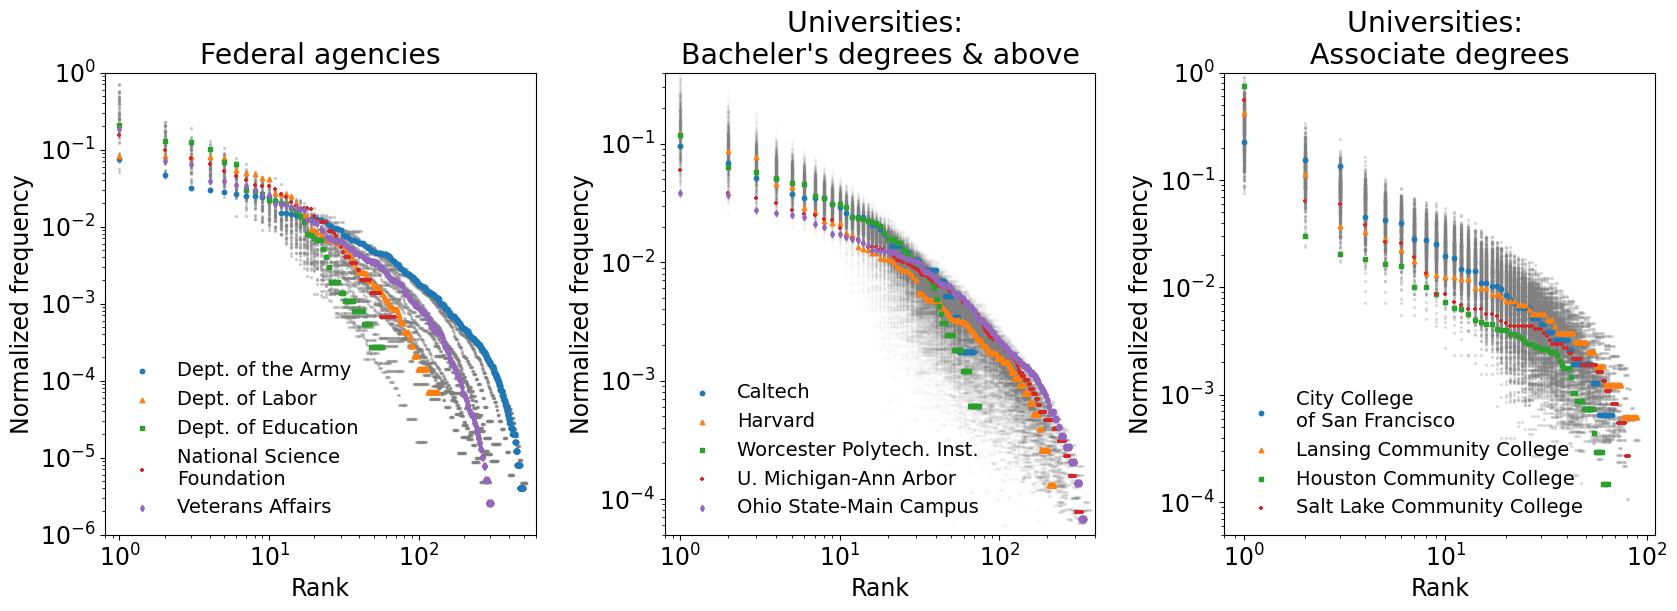

In [10]:

            
plt.figure(figsize = (20, 6))
markers = ['o', '^', 's', '+', 'd']
colors = plt.cm.tab10
thresh = 20 # min number of functions 

# ---- Fed agencies -----
plt.subplot(131)

h_fed = {'AR': 'Dept. of the Army',
        'VA': 'Veterans Affairs', 
         'ED': 'Dept. of Education', 
         'DL': 'Dept. of Labor', 
        'NF': 'National Science \nFoundation'}

n_1 = plot_rf_by_org(fed_fine_rf, 'AGY', 'EMPLOYMENT', thresh, h_fed, markers, alpha = 0.3)
plt.title('Federal agencies')
plt.ylim([1e-6, 1])
plt.xlim([0.8, 6e2])

# ---- Unis, Bachelor's & above -----

plt.subplot(132)

h_uni = {166027: 'Harvard', 
        110404:'Caltech', 
        170976: 'U. Michigan-Ann Arbor', 
        168421:'Worcester Polytech. Inst.', 
        204796:'Ohio State-Main Campus'}

n_2 = plot_rf_by_org(uni_fine_rf, 'UNITID', 'nDegrees', thresh, h_uni,markers,  alpha = 0.02)

plt.title("Universities: \nBacheler's degrees & above")
plt.ylim([5e-5, 0.4])
plt.xlim([0.8, 4e2])

# ---- Unis, Associate & above -----
h_uni_asso = {230746: 'Salt Lake Community College', 
             112190: "City College \nof San Francisco", 
             225423: "Houston Community College", 
            170657: "Lansing Community College"}

plt.subplot(133)
n_3 = plot_rf_by_org(uni_assoc_fine_rf, 'UNITID', 'nDegrees', thresh, h_uni_asso,markers, alpha = 0.2)

plt.title("Universities: \nAssociate degrees")
plt.ylim([5e-5, 1])
plt.xlim([0.8, 1.1e2])

plt.subplots_adjust(wspace = 0.3)
#plt.savefig('rank_freq_fine.pdf')  


## Load and plot city data

In [11]:
msa = pd.read_csv('Formated data/msa.csv')
msa_fine_rf = pd.read_csv('Formated data/msa_fine_rf.csv')

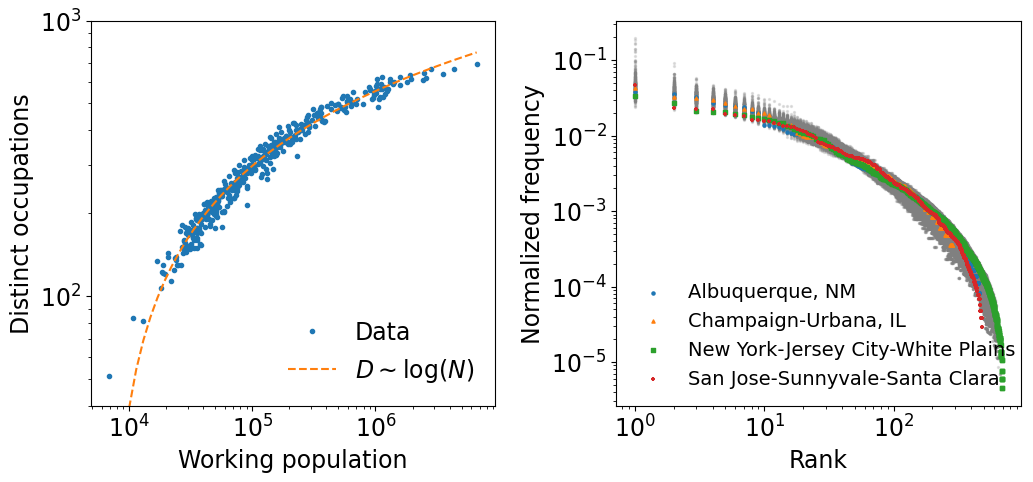

In [14]:
plt.figure(figsize = (12, 5))

# ---- diversity scaling plot ---
plt.subplot(1, 2, 1)
plt.loglog(msa.N, msa.D, '.')
alpha, c = np.polyfit(np.log(msa.N), msa.D, 1)
x= np.logspace(4,np.log10(msa.N.max()), 50)

plt.loglog(x, np.log(x)*alpha + c, '--')
#plt.loglog(x, x**(1/2), ':')

plt.ylim([40, 1000])
plt.xlabel('Working population')
plt.ylabel('Distinct occupations')
plt.legend(['Data', '$D \sim \log (N)$'],  frameon=False,)

# ---- rank frequency plot ---
msa_highlights = {
    35614: 'New York-Jersey City-White Plains',
    16580: "Champaign-Urbana, IL", 
    10740: "Albuquerque, NM", 
    41940: "San Jose-Sunnyvale-Santa Clara"
}

plt.subplot(1, 2, 2)
n_4= plot_rf_by_org(msa_fine_rf, 'AREA', 'TOT_EMP', thresh, msa_highlights,markers, alpha = 0.2, color_marker_size = 5)
plt.subplots_adjust(wspace = 0.3)

plt.savefig('msa_plot.pdf', bbox_inches='tight')  
